<a href="https://www.kaggle.com/code/raman209/nlp-emotion-recognition-pipeline?scriptVersionId=146637343" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-dataset/Emotion_classify_Data.csv



# Import necessary libraries


In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import spacy



# Load the dataset

In [3]:
df=pd.read_csv('/kaggle/input/emotion-dataset/Emotion_classify_Data.csv')

# Basic Data Exploration

In [4]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [5]:
df.shape

(5937, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [7]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [8]:
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [9]:
df['sentiment']=df['Emotion'].map({
    'anger':0,
    'joy':1,
    'fear':2
})

In [10]:
df.head()

,Comment,Emotion,sentiment
0,i seriously hate one subject to death but now ...,fear,2
1,im so full of life i feel appalled,anger,0
2,i sit here to write i start to dig out my feel...,fear,2
3,ive been really angry with r and i feel like a...,joy,1
4,i feel suspicious if there is no one outside l...,fear,2


# Text Preprocessing

In [11]:
nlp=spacy.load("en_core_web_sm")

def preprocess(text):
    
    doc = nlp(text)
    list = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        list.append(token.lemma_)
    
    return " ".join(list) 

In [12]:
df['p_comment'] = df['Comment'].apply(preprocess) 

# Machine Learning Model 

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df['p_comment'],df['sentiment'],test_size=0.2)

In [14]:
X_train.shape

(4749,)

In [15]:
X_test.shape

(1188,)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import TfidfVectorizer


clf = Pipeline([
    
     ('vectorizer_tfidf',TfidfVectorizer()),    
    
   ('dec_tree', DecisionTreeClassifier())
  
])

clf.fit(X_train, Y_train)

prediction = clf.predict(X_test)

print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       401
           1       0.94      0.93      0.93       393
           2       0.92      0.93      0.93       394

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, prediction)


In [18]:
accuracy

0.9284511784511784

In [19]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(Y_test, prediction)


In [20]:
c_m

array([[371,  11,  19],
       [ 16, 364,  13],
       [ 15,  11, 368]])

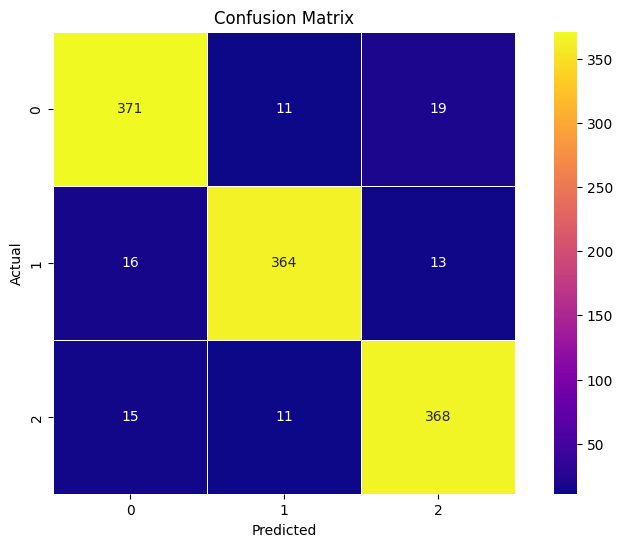

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(c_m, annot=True, fmt='d', cmap='plasma', linewidths=0.4, square=True, cbar=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()